In [1]:
import sys
sys.path.insert(1, '..')
from ProdSeqAnalysis_utils import *

In [2]:
# Not necessary - suppress any findfont warnings
import logging
font_logger = logging.getLogger('matplotlib.font_manager')
font_logger.setLevel(logging.CRITICAL)

(<Figure size 1200x1200 with 1 Axes>, <Figure size 800x800 with 1 Axes>)

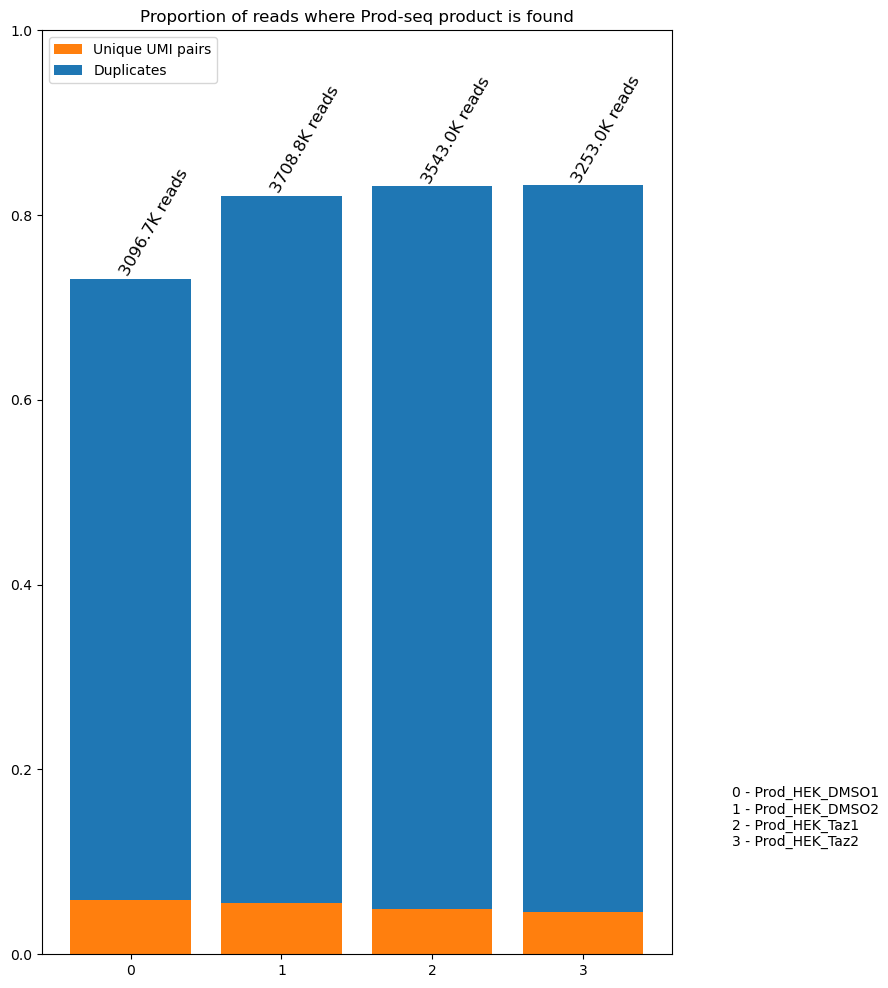

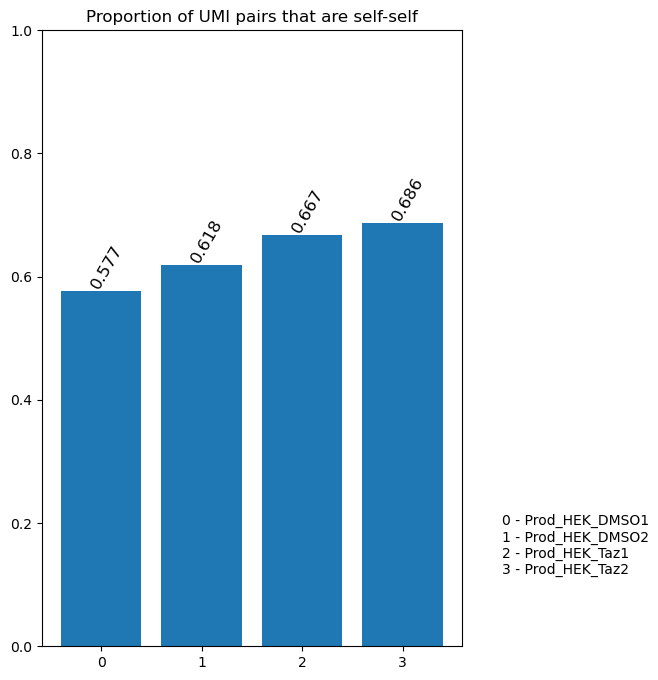

In [3]:
GenerateProdQCPlots("./example_output/example_prod_output.QCCnts.tsv")

In [4]:
PPI_enrichment_unnormed, PPI_sample_nms, PPI_nms = ReadProdTSVFile("./example_output/example_prod_output.PPIEnrichment.tsv")

In [5]:
# Normalize PPI enrichment by MED12&CycC
PPI_enrichment_normed = []
for idx in range(len(PPI_enrichment_unnormed)):
    PPI_enrichment_normed.append([x / PPI_enrichment_unnormed[idx][49] for x in PPI_enrichment_unnormed[idx]])

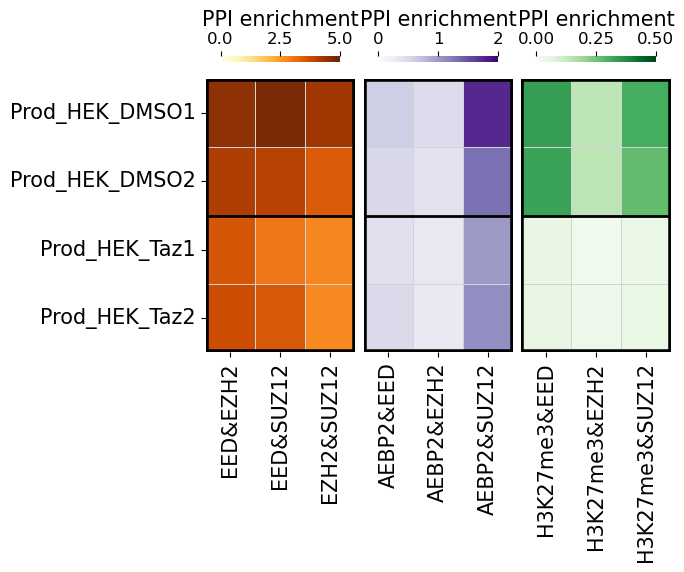

In [6]:
plot_cmaps = [
    sns.color_palette("YlOrBr", as_cmap = True),
    sns.color_palette("Purples", as_cmap = True),
    sns.color_palette("Greens", as_cmap = True),
    sns.color_palette("Blues", as_cmap = True),
]

PPI_plot_groups = [
    ["EED&EZH2", "EED&SUZ12", "EZH2&SUZ12"],
    ["AEBP2&EED", "AEBP2&EZH2", "AEBP2&SUZ12"],
    ["H3K27me3&EED", "H3K27me3&EZH2", "H3K27me3&SUZ12"],
]

fig = GroupedPPIHeatmap(PPI_enrichment_normed, PPI_sample_nms, PPI_nms, bc_pair_groups = PPI_plot_groups, plot_vmax = [5, 2, 0.5],
                      plot_size = (6, 6),
                      plot_vmin = [],
                      plot_cmaps = plot_cmaps,
                      sample_group_sizes = [2, 2],
                      cbar_ax_locs = [])

In [7]:
PQ_data, PQ_sample_nms, PQ_col_nms = ReadProdTSVFile("./example_output/example_pq_output.PQRawUMIs.tsv")
PQ_prop, PQ_Ctrl_normed = CalcPQFromUMICnts(PQ_data)

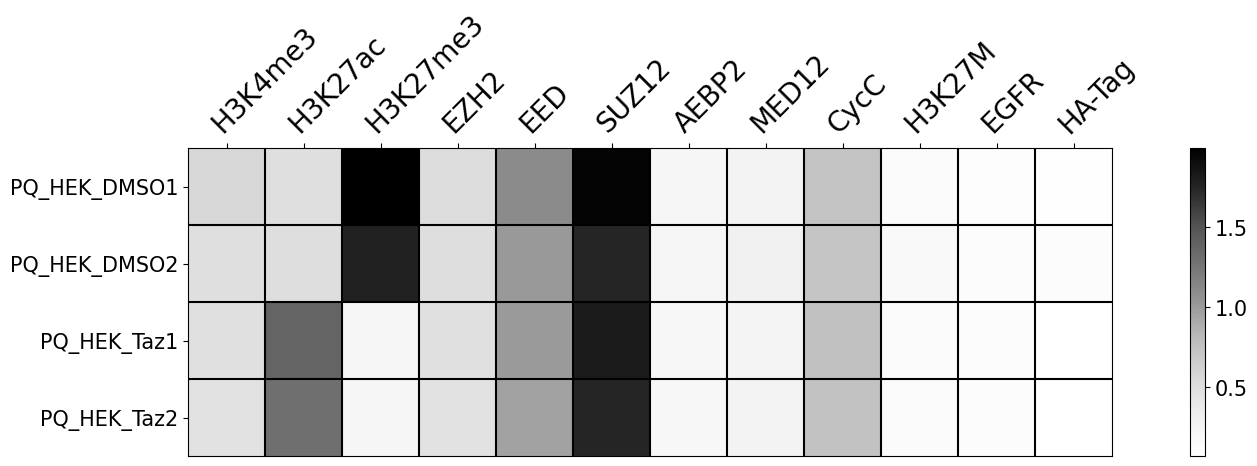

In [8]:
fig = PQHeatmap(PQ_Ctrl_normed, PQ_sample_nms)